<a href="https://colab.research.google.com/github/Annie-blare/WSL_LAB/blob/main/Jowar_Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def individual_analysis(file_path, district_name, variable1, variable2, user_perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Selecting the specified variables
    X = data[[variable1]]
    y = data[variable2]

    # Performing linear regression
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # Extracting variable1 for the specified district
    district_variable1 = data.loc[data['District'] == district_name, variable1].iloc[0]

    # User provided perturbations in percentages
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Calculating variable2(old) for the specified district
    variable2_old = data.loc[data['District'] == district_name, variable2].iloc[0]

    # Min-max normalization for variable2(old)
    variable2_min = y.min()
    variable2_max = y.max()
    normalized_variable2_old = (variable2_old - variable2_min) / (variable2_max - variable2_min)

    # Applying corrected perturbations and calculating new values
    results_corrected = []
    for p in perturbations_corrected:
        perturbed_variable1 = district_variable1 * (1 + p)
        variable2_new = m * perturbed_variable1 + c
        normalized_variable2_new = (variable2_new - variable2_min) / (variable2_max - variable2_min)
        change_in_variable2 = variable2_new - variable2_old
        impact = normalized_variable2_new - normalized_variable2_old

        results_corrected.append({
            'Perturbation': f'P{user_perturbations.index(p*100)+1}',
            'Magnitude (%)': p*100,
            f'{variable2}_old': variable2_old,
            f'Normalized_{variable2}_old': normalized_variable2_old,
            f'{variable2}_new': variable2_new,
            f'Normalized_{variable2}_new': normalized_variable2_new,
            f'Change_in_{variable2}': change_in_variable2,
            'Impact': impact
        })

    results_df_corrected = pd.DataFrame(results_corrected)
    print(results_df_corrected)

# Example Usage:
file_path = '/content/Agriculture_KAG_2016_17.csv'
district_name = 'BENGALURU'
variable1 = 'TotalNPK'
variable2 = 'Jowar_Yield'
user_perturbations = [-20,-10,10,20]
individual_analysis(file_path, district_name, variable1, variable2, user_perturbations)


  Perturbation  Magnitude (%)  Jowar_Yield_old  Normalized_Jowar_Yield_old  \
0           P1          -20.0             1539                    0.686441   
1           P2          -10.0             1539                    0.686441   
2           P3           10.0             1539                    0.686441   
3           P4           20.0             1539                    0.686441   

   Jowar_Yield_new  Normalized_Jowar_Yield_new  Change_in_Jowar_Yield  \
0       547.537431                    0.244218            -991.462569   
1       570.414310                    0.254422            -968.585690   
2       616.168067                    0.274830            -922.831933   
3       639.044946                    0.285033            -899.955054   

     Impact  
0 -0.442222  
1 -0.432019  
2 -0.411611  
3 -0.401407  


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def district_analysis(file_path, variable1, variable2, user_perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Performing linear regression on the entire dataset
    X = data[[variable1]]
    y = data[variable2]
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # User provided perturbations in percentages
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Min-max normalization parameters for variable2
    variable2_min = y.min()
    variable2_max = y.max()

    # Loop through each unique district in the dataset
    for district in data['District'].unique():
        district_variable1 = data.loc[data['District'] == district, variable1].iloc[0]
        variable2_old = data.loc[data['District'] == district, variable2].iloc[0]
        normalized_variable2_old = (variable2_old - variable2_min) / (variable2_max - variable2_min)

        district_results = []

        # Applying perturbations and calculating new values for each perturbation
        for p in perturbations_corrected:
            perturbed_variable1 = district_variable1 * (1 + p)
            variable2_new = m * perturbed_variable1 + c
            normalized_variable2_new = (variable2_new - variable2_min) / (variable2_max - variable2_min)
            change_in_variable2 = variable2_new - variable2_old
            impact = normalized_variable2_new - normalized_variable2_old

            district_results.append({
                'Perturbation (%)': p * 100,
                f'{variable2}_old': variable2_old,
                f'Normalized_{variable2}_old': normalized_variable2_old,
                f'{variable2}_new': variable2_new,
                f'Normalized_{variable2}_new': normalized_variable2_new,
                f'Change_in_{variable2}': change_in_variable2,
                'Impact': impact
            })

        # Convert the district results into a DataFrame and print it
        district_df = pd.DataFrame(district_results)
        print(f"Results for {district}:")
        print(district_df)
        print("\n")  # Add a newline for better readability between districts

# Example Usage:
file_path = '/content/Agriculture_KAG_2016_17.csv'
variable1 = 'TotalNPK'
variable2 = 'Jowar_Yield'
user_perturbations = [-20,-10,10,20]
district_analysis(file_path, variable1, variable2, user_perturbations)


Results for BENGALURU:
   Perturbation (%)  Jowar_Yield_old  Normalized_Jowar_Yield_old  \
0             -20.0             1539                    0.686441   
1             -10.0             1539                    0.686441   
2              10.0             1539                    0.686441   
3              20.0             1539                    0.686441   

   Jowar_Yield_new  Normalized_Jowar_Yield_new  Change_in_Jowar_Yield  \
0       547.537431                    0.244218            -991.462569   
1       570.414310                    0.254422            -968.585690   
2       616.168067                    0.274830            -922.831933   
3       639.044946                    0.285033            -899.955054   

     Impact  
0 -0.442222  
1 -0.432019  
2 -0.411611  
3 -0.401407  


Results for BENGALURU(R):
   Perturbation (%)  Jowar_Yield_old  Normalized_Jowar_Yield_old  \
0             -20.0                0                         0.0   
1             -10.0                0

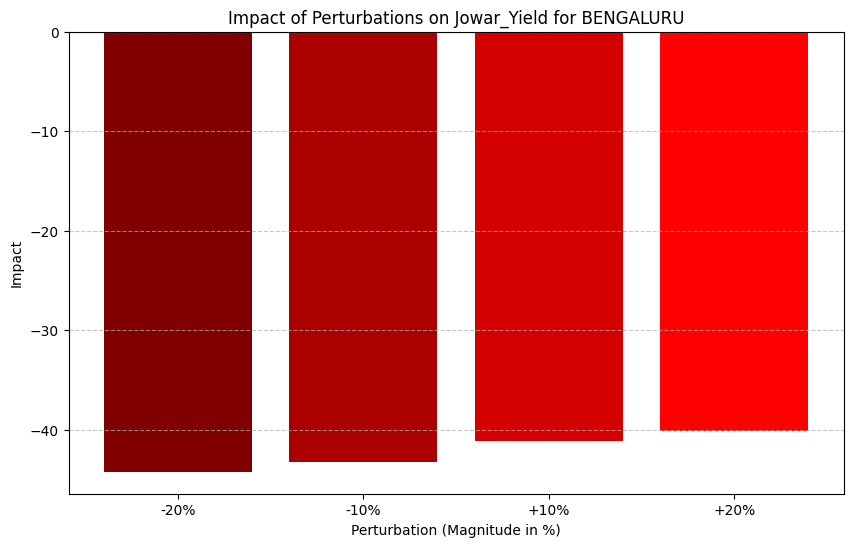

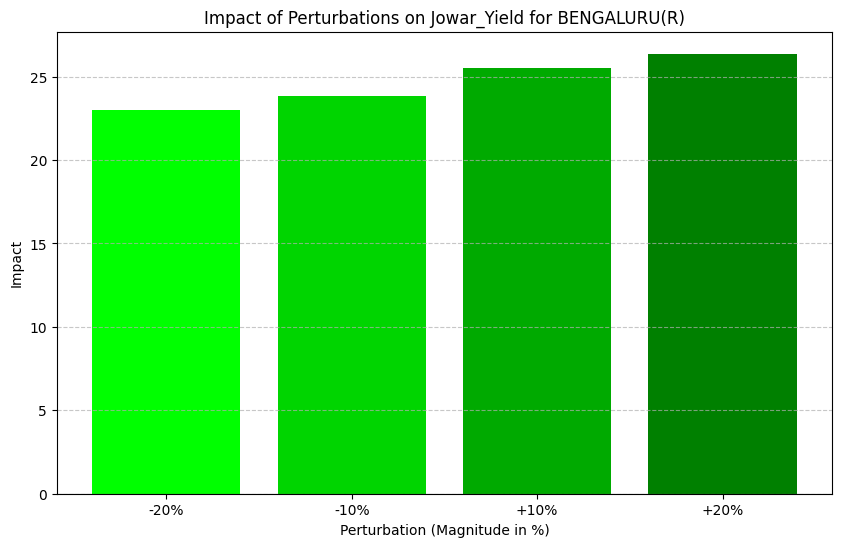

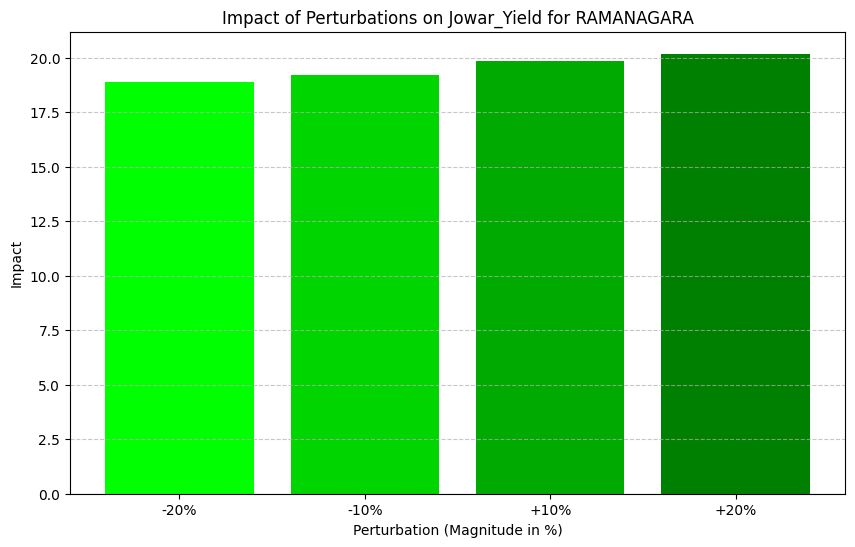

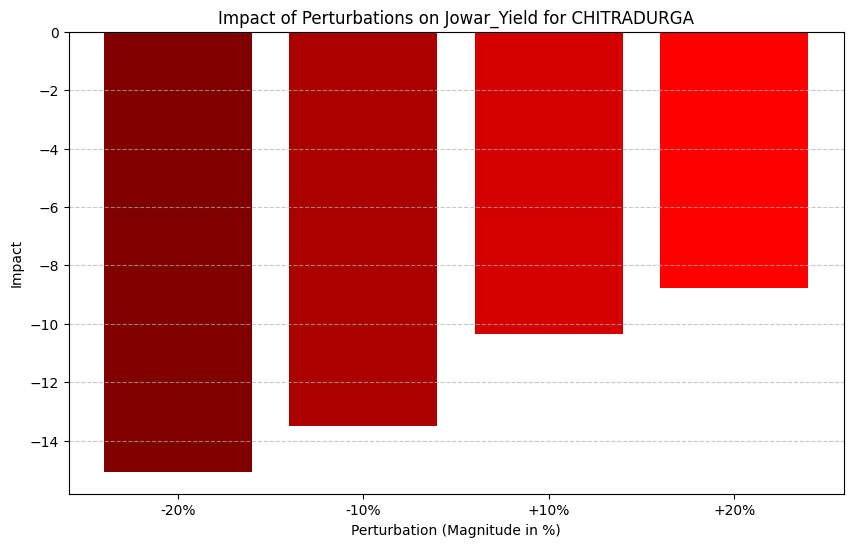

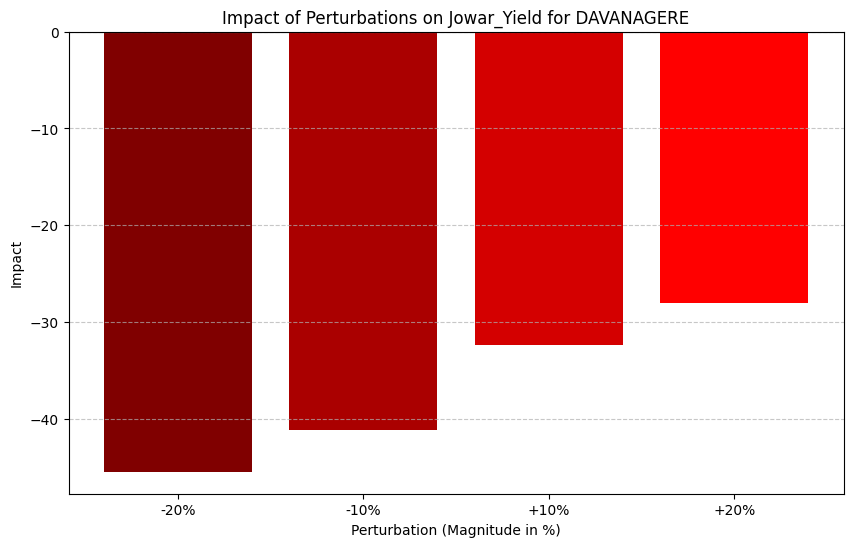

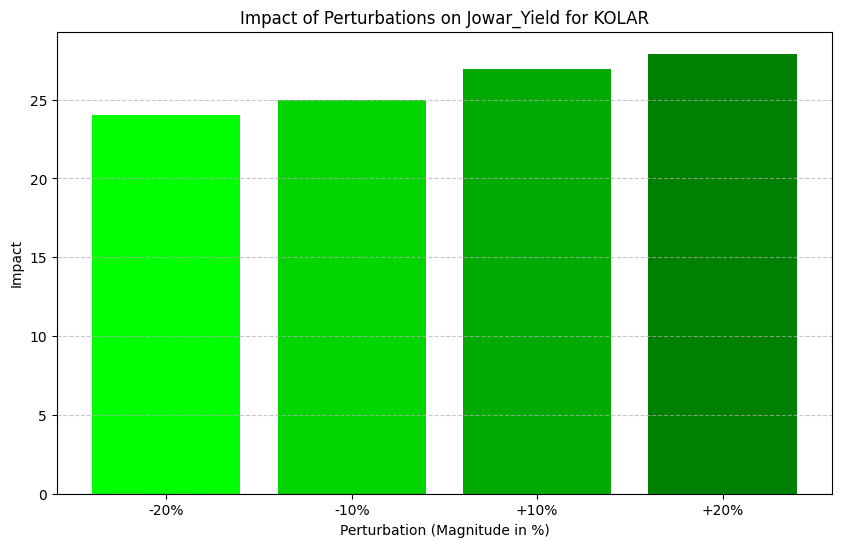

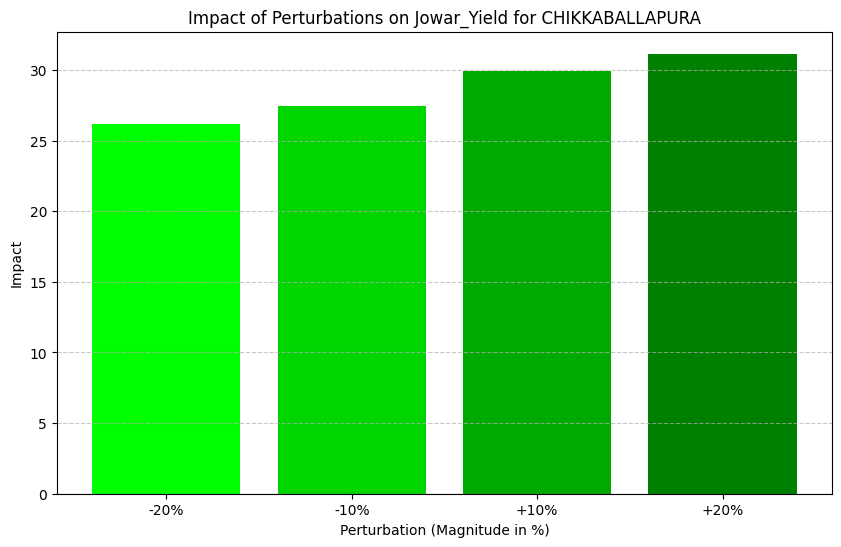

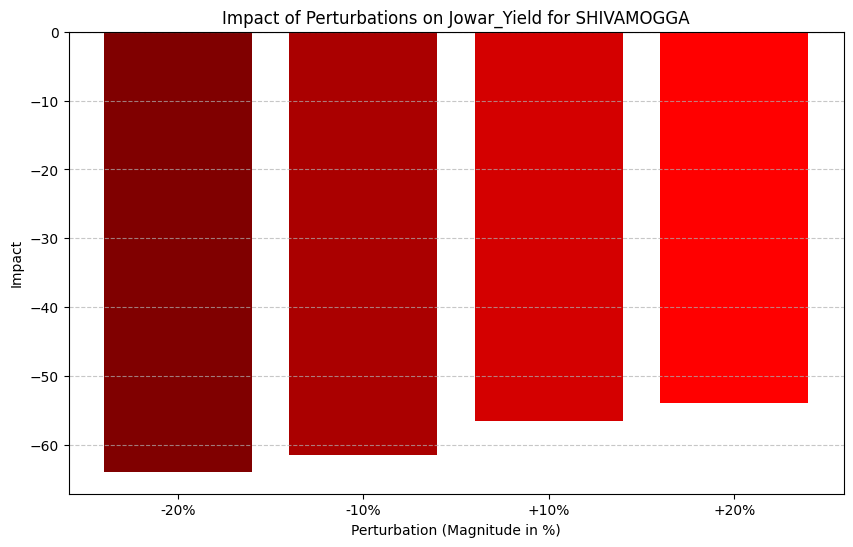

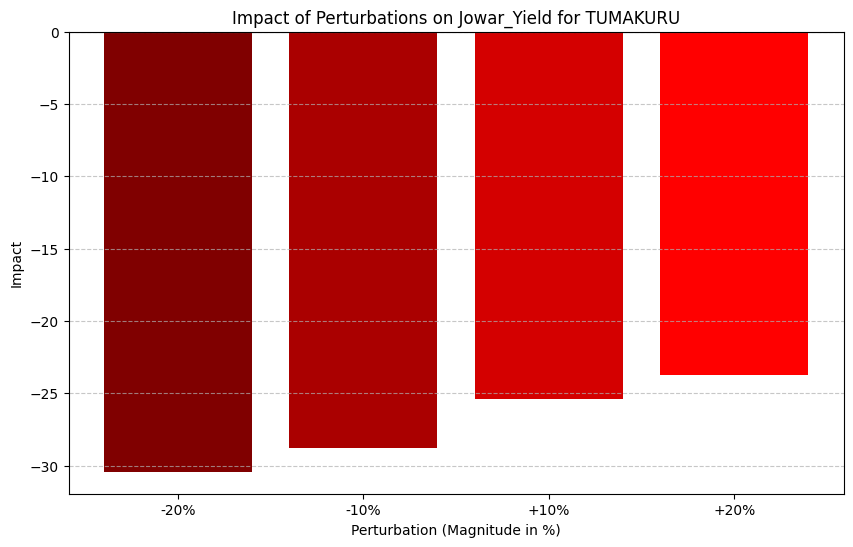

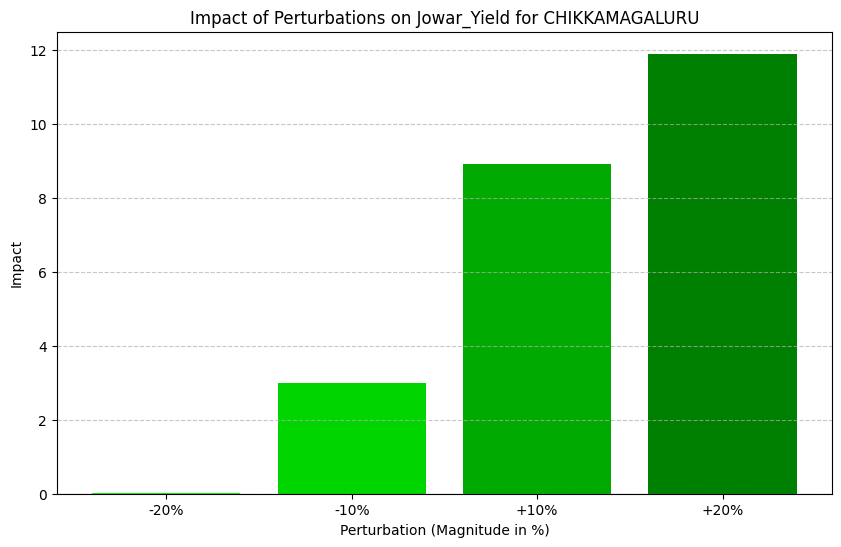

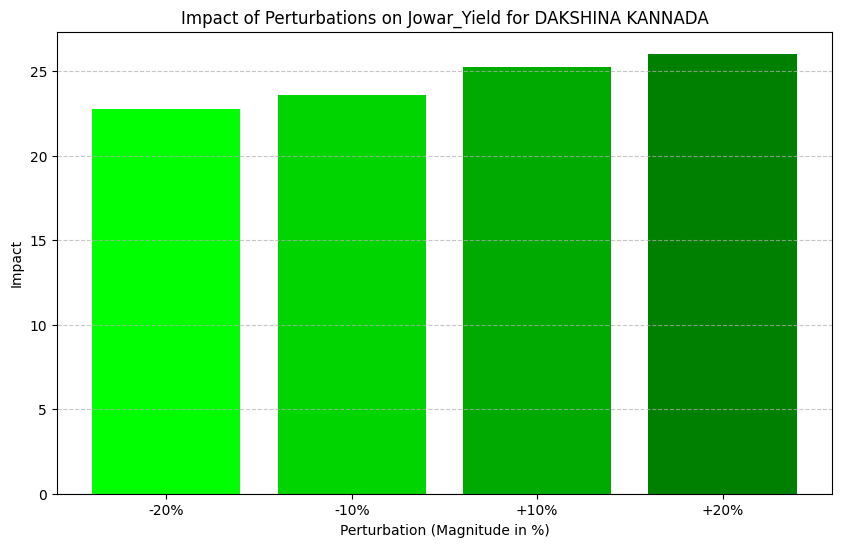

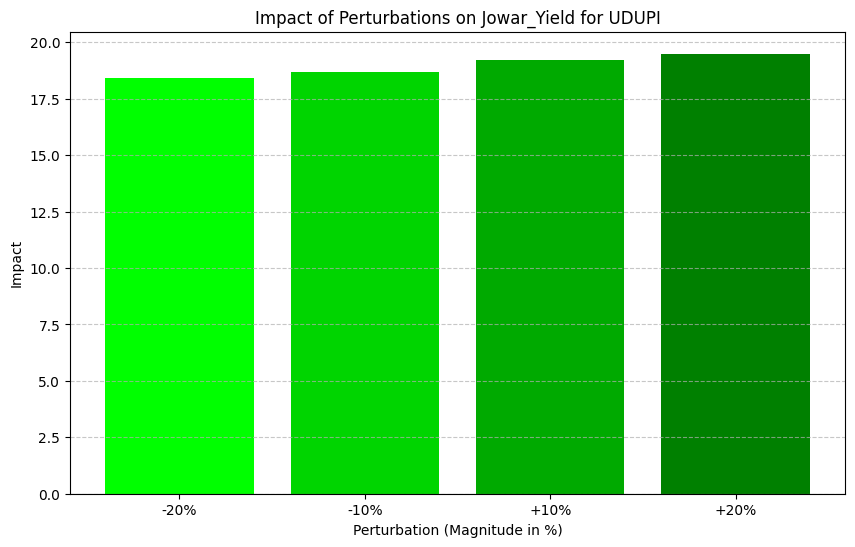

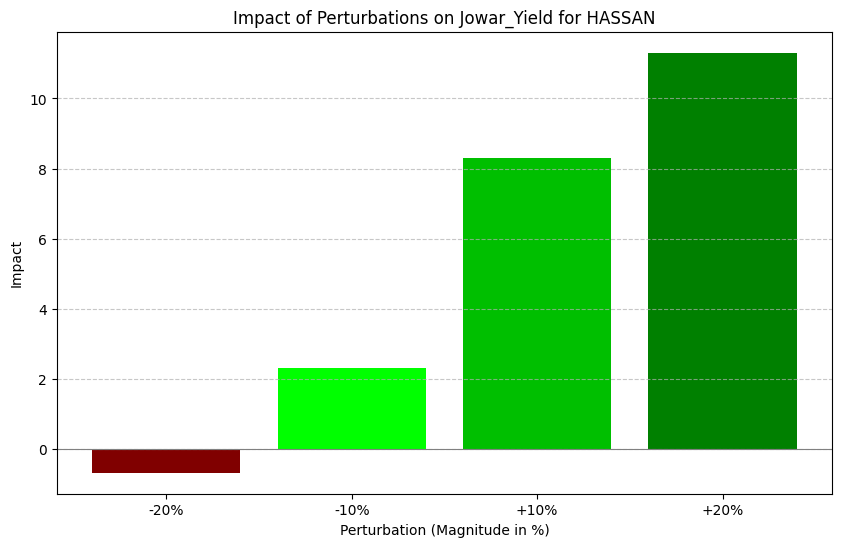

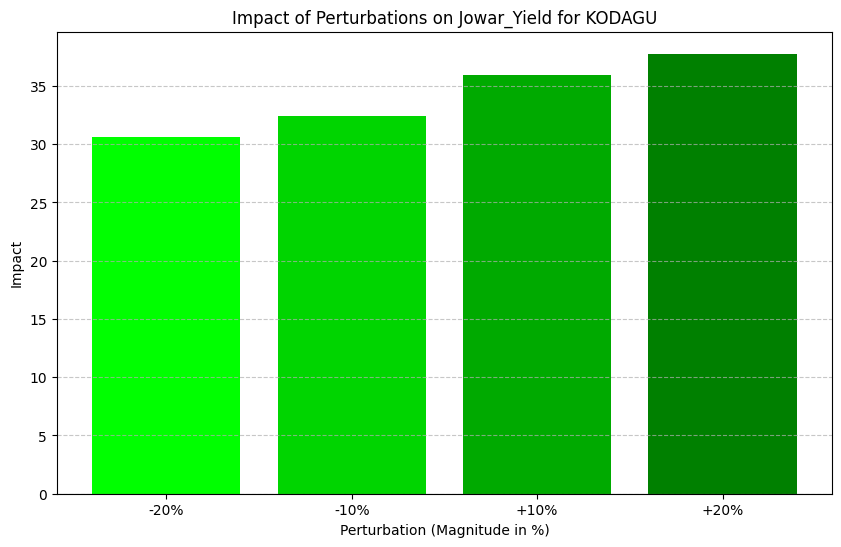

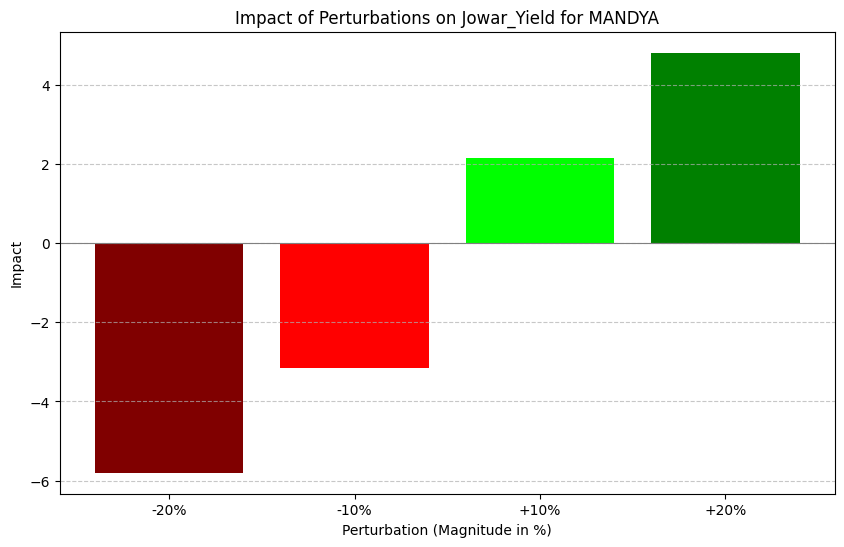

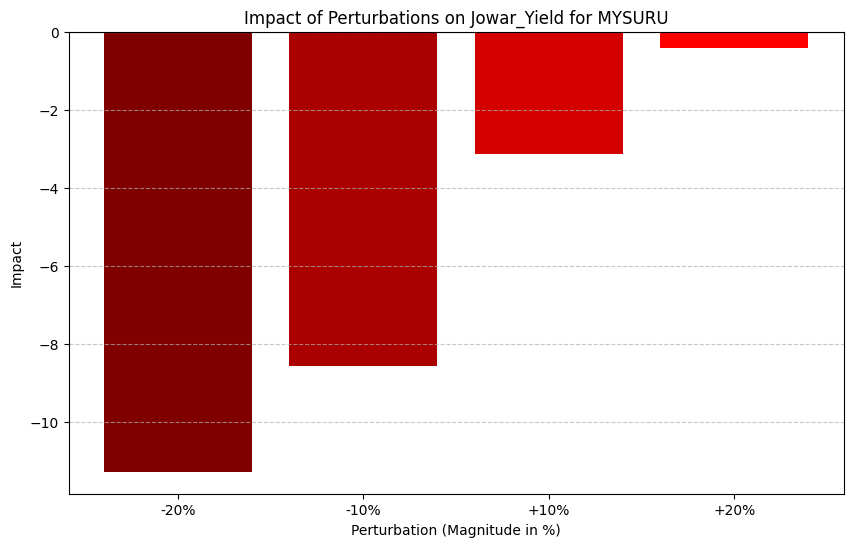

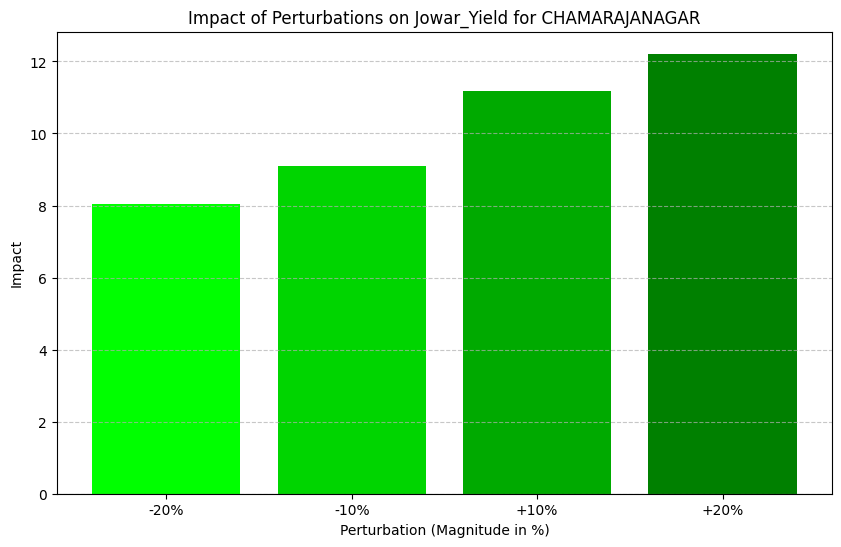

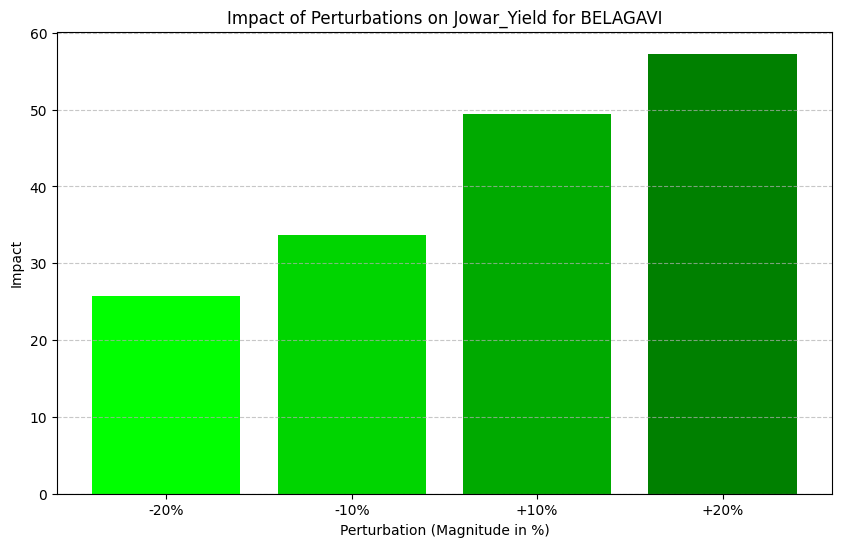

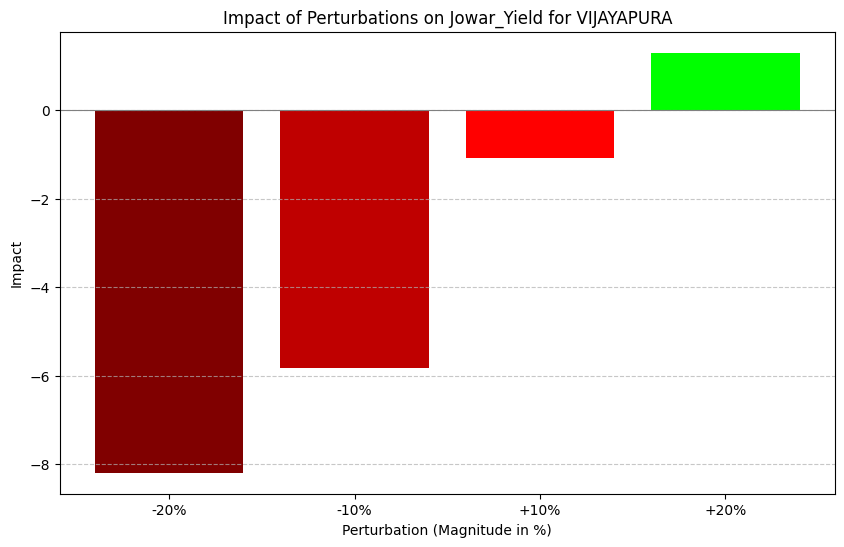

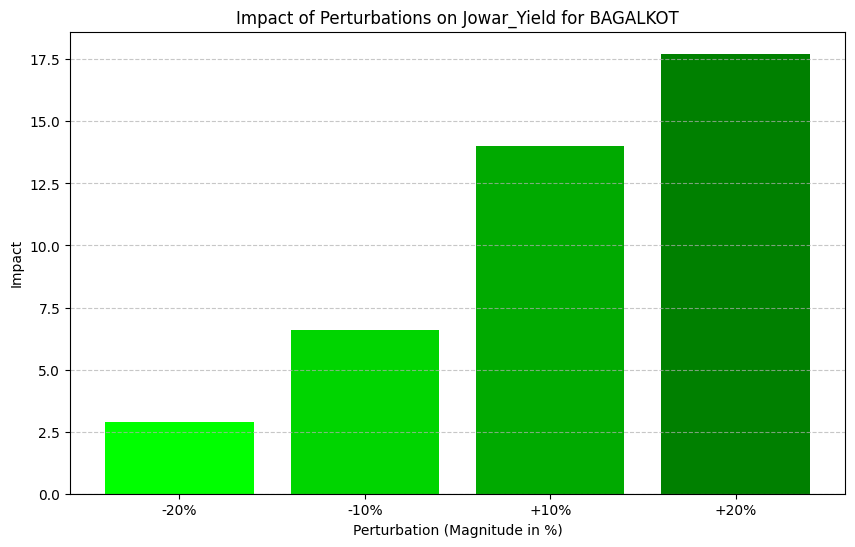

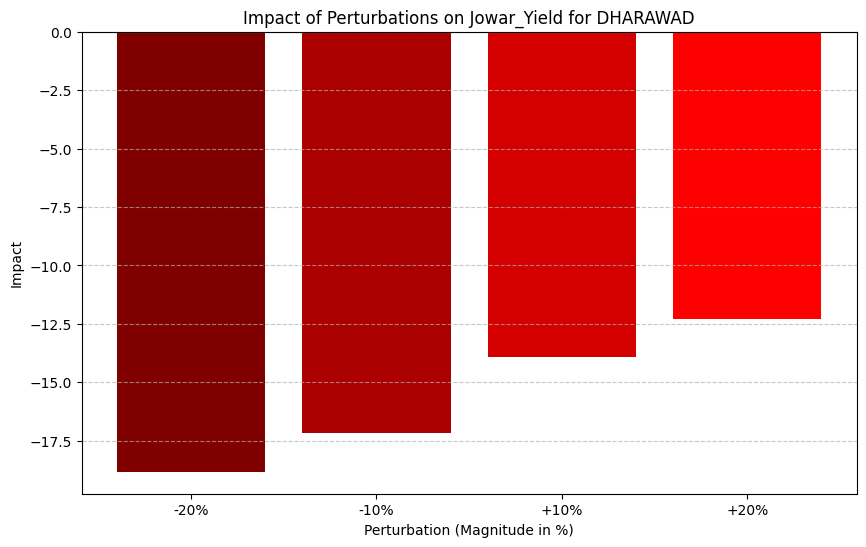

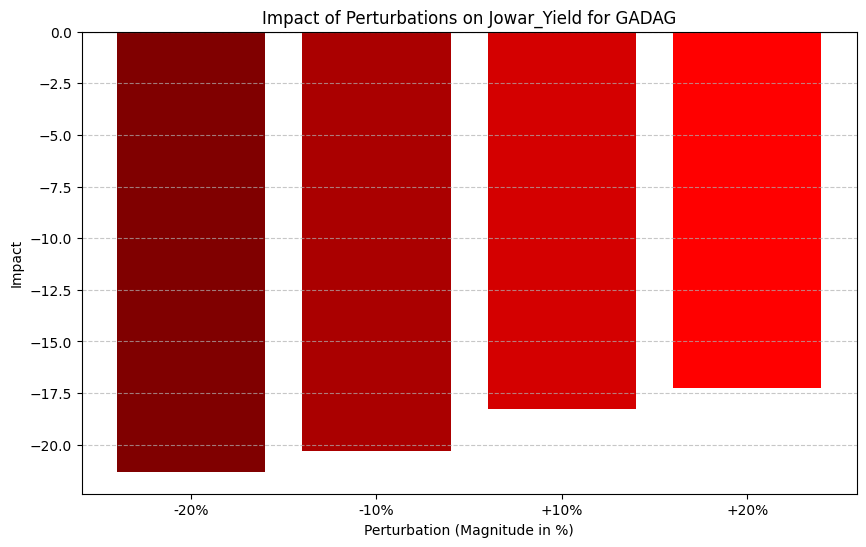

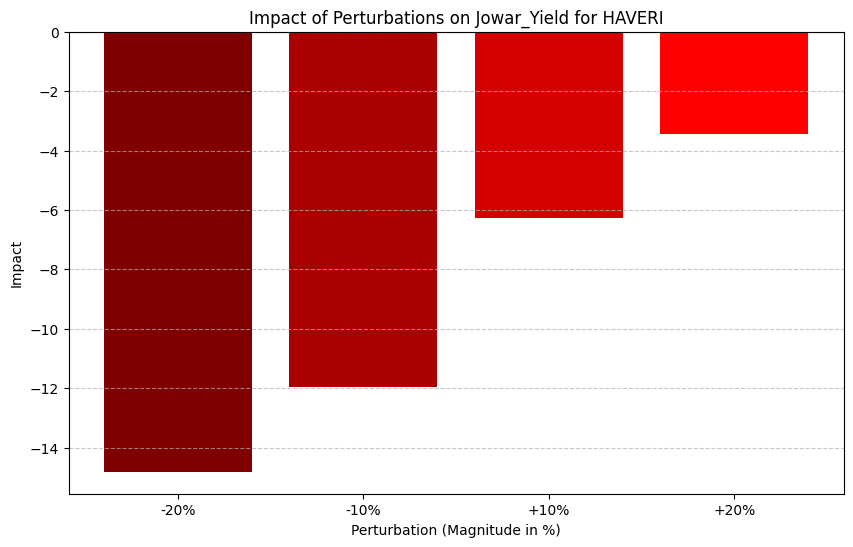

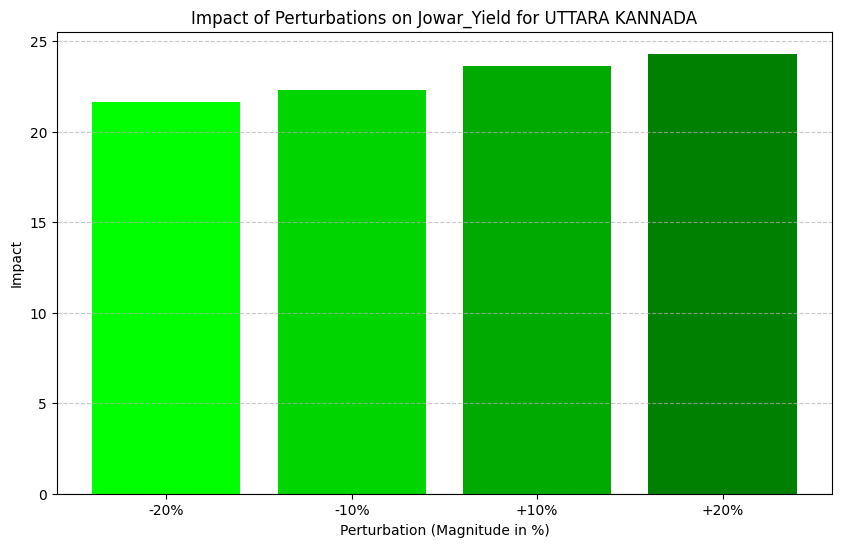

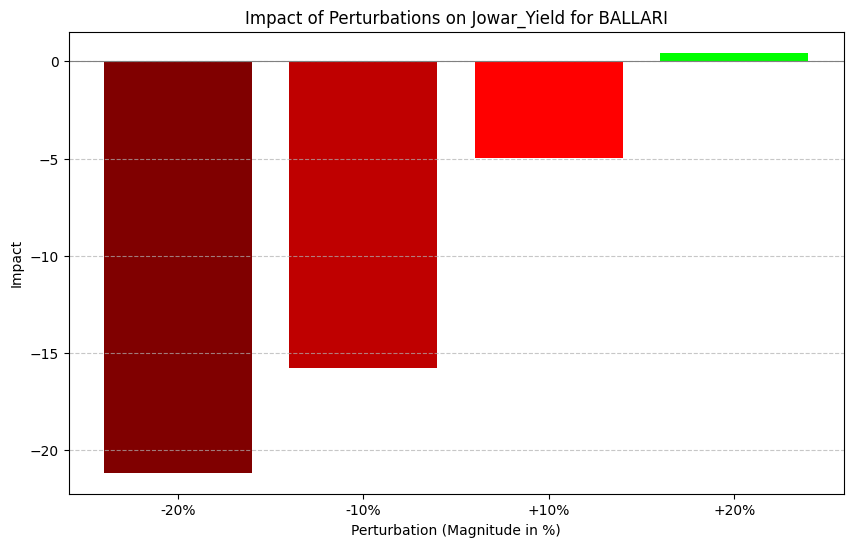

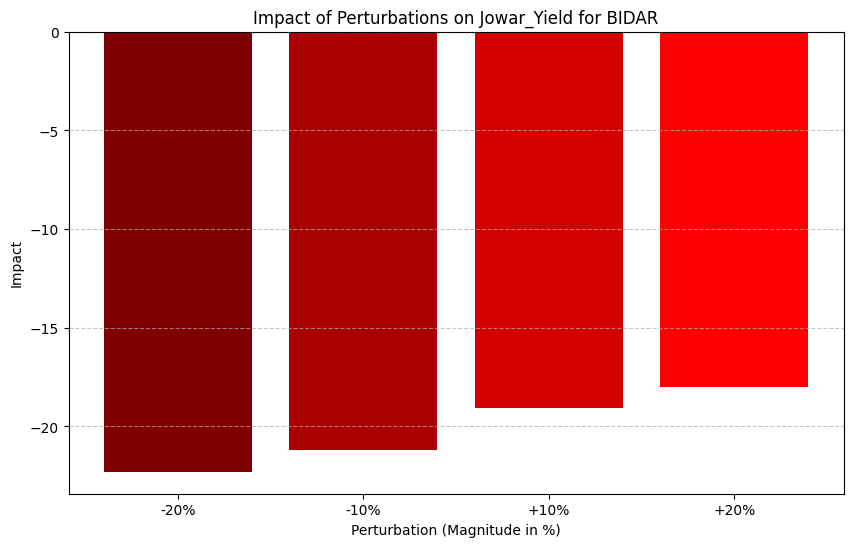

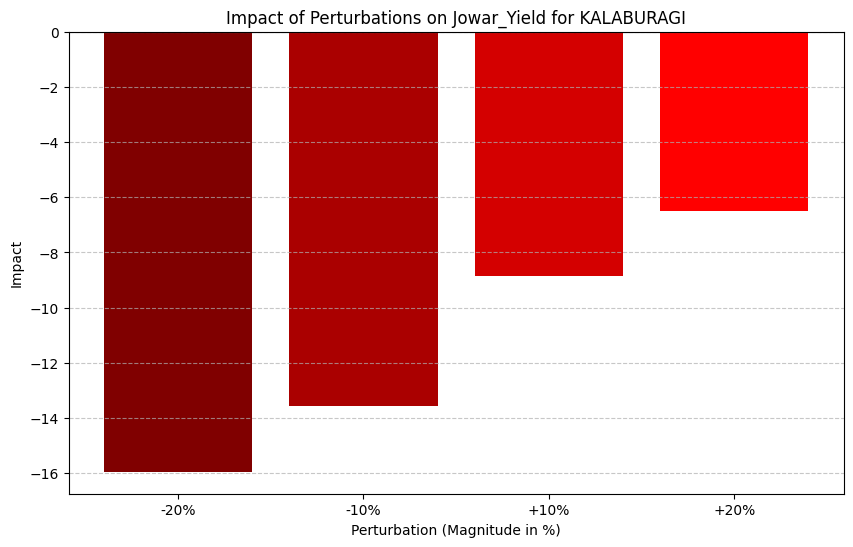

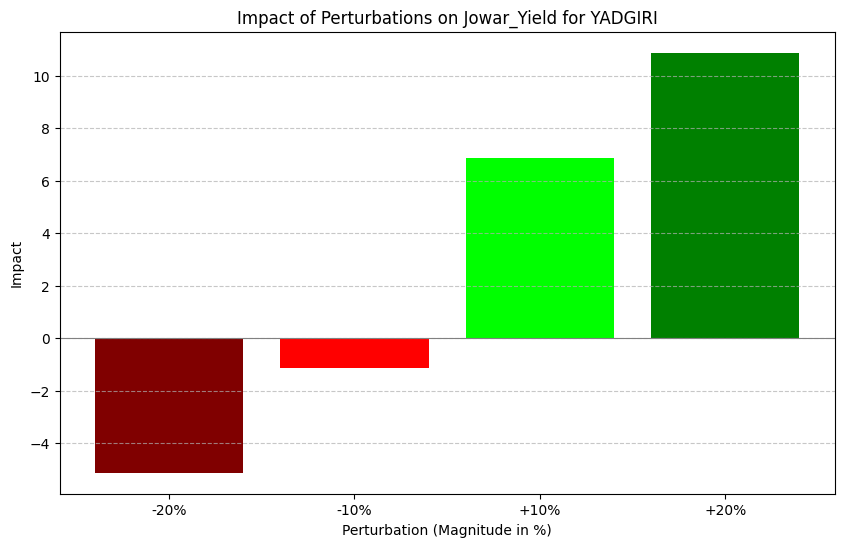

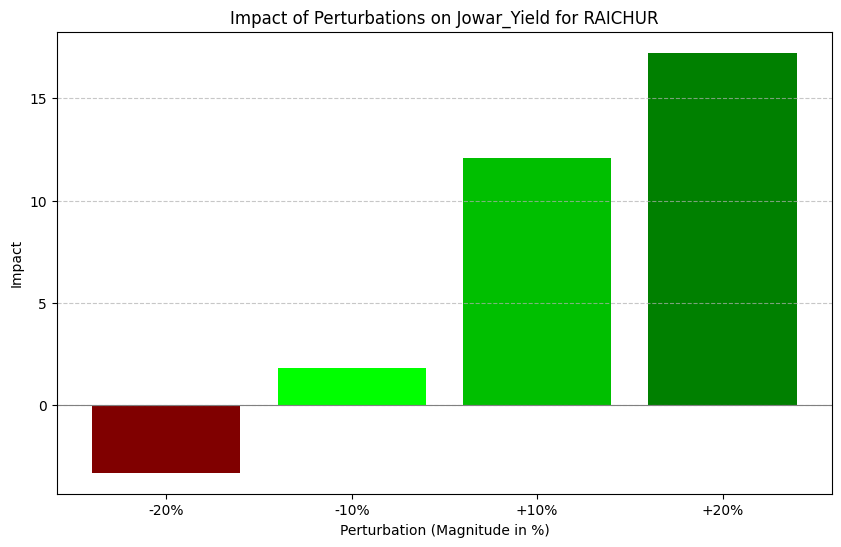

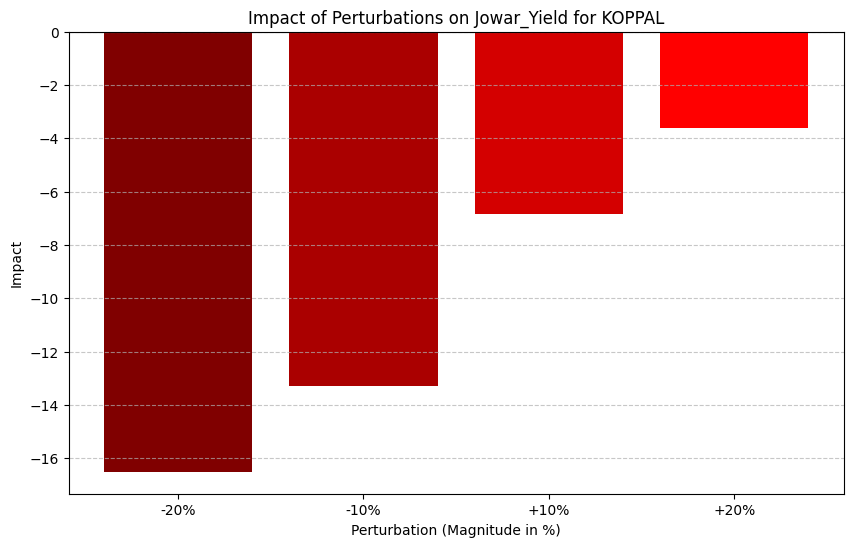

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjust this path as needed
data = pd.read_csv(file_path)

# Performing linear regression on the entire dataset
X = data[['TotalNPK']]
y = data['Jowar_Yield']
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# User provided perturbations in percentages
user_perturbations = [-20,-10,10,20]
# Converting percentages to fractions for calculation
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Min-max normalization parameters for 'Rice_Production'
rice_production_min = y.min()
rice_production_max = y.max()

# Loop through each unique district in the dataset
for district in data['District'].unique():
    district_totalnpk = data.loc[data['District'] == district, 'TotalNPK'].iloc[0]
    rice_production_old = data.loc[data['District'] == district, 'Jowar_Yield'].iloc[0]
    normalized_old = (rice_production_old - rice_production_min) / (rice_production_max - rice_production_min)

    impacts = []

    for p in perturbations_corrected:
        perturbed_totalnpk = district_totalnpk * (1 + p)
        rice_production_new = m * perturbed_totalnpk + c
        normalized_new = (rice_production_new - rice_production_min) / (rice_production_max - rice_production_min)
        impact = (normalized_new - normalized_old) * 100  # Impact calculation
        impacts.append(impact)

    # Function to generate colors based on impact
    def generate_colors(impacts):
        # Separate positive and negative impacts
        positive_impacts = [imp for imp in impacts if imp > 0]
        negative_impacts = [imp for imp in impacts if imp < 0]

        # Calculate gradients
        # For positive impacts: Dark to light green (we will reverse this to meet your requirement)
        green_gradients = np.linspace(1, 0.5, len(positive_impacts)) if positive_impacts else []
        # For negative impacts: Light to dark red
        red_gradients = np.linspace(0.5, 1, len(negative_impacts)) if negative_impacts else []

        # Assign colors based on impact value, with a transition from dark to light for positive impacts
        colors = []
        for impact in impacts:
            if impact > 0:
                # Find the index of the impact in positive_impacts to get the corresponding shade
                index = positive_impacts.index(impact)
                color = (0, green_gradients[index], 0)  # Green shade from dark to light
            elif impact < 0:
                # Find the index of the impact in negative_impacts to get the corresponding shade
                index = negative_impacts.index(impact)
                color = (red_gradients[index], 0, 0)  # Red shade from light to dark
            else:
                color = (0.8, 0.8, 0.8)  # Grey for neutral impact
            colors.append(color)

        return colors

    # Generate colors based on sorted impacts
    colors = generate_colors(impacts)

    # Plotting the impacts of each perturbation with custom colors
    plt.figure(figsize=(10, 6))
    plt.bar([f'{p*100:+.0f}%' for p in perturbations_corrected], impacts, color=colors)
    plt.xlabel('Perturbation (Magnitude in %)')
    plt.ylabel('Impact')
    plt.title(f'Impact of Perturbations on Jowar_Yield for {district}')
    plt.axhline(0, color='gray', linewidth=0.8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


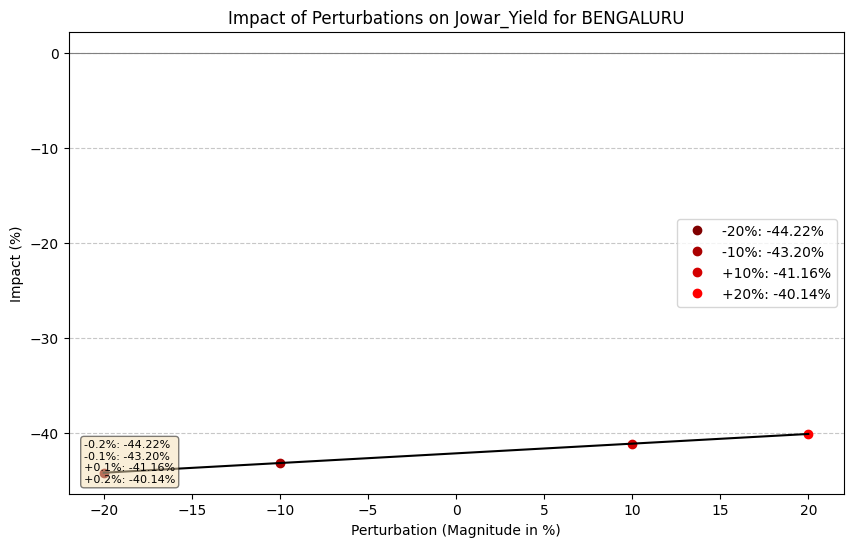

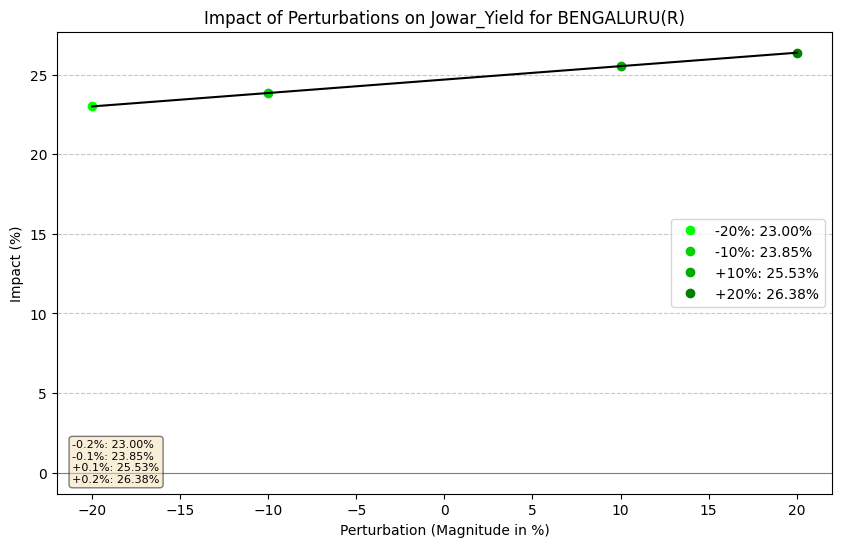

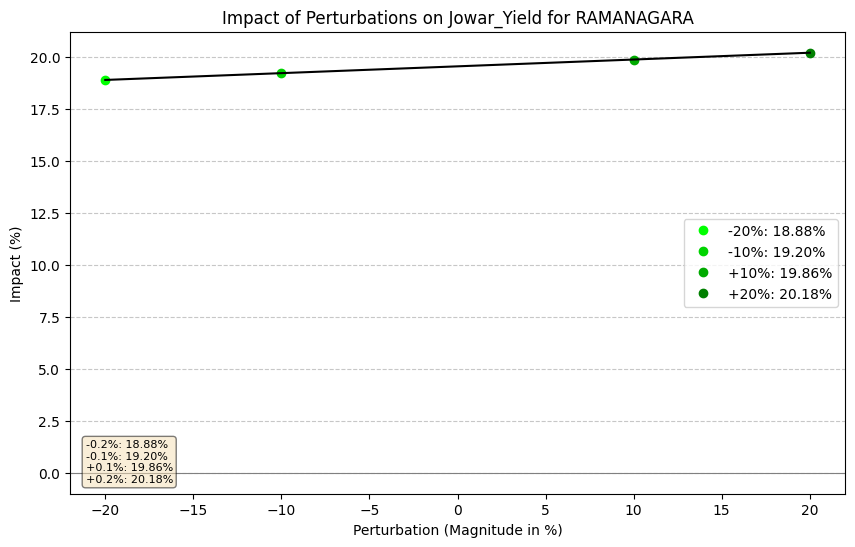

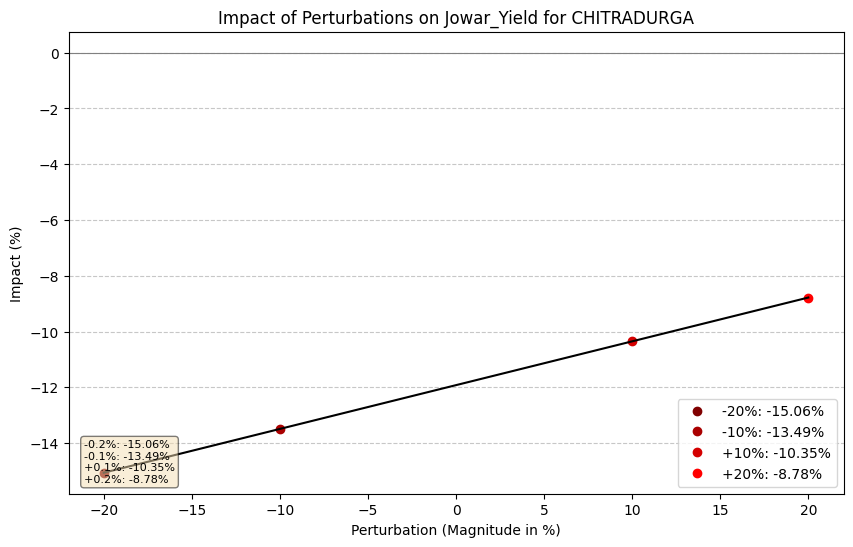

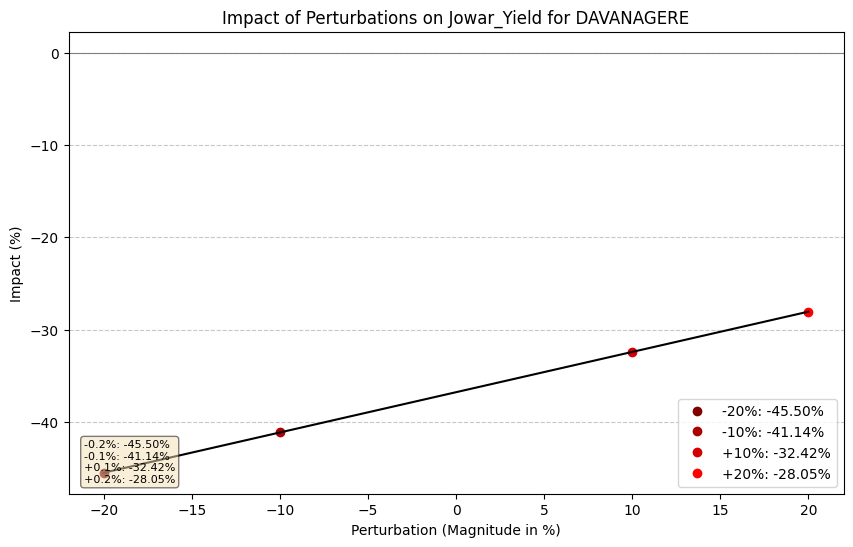

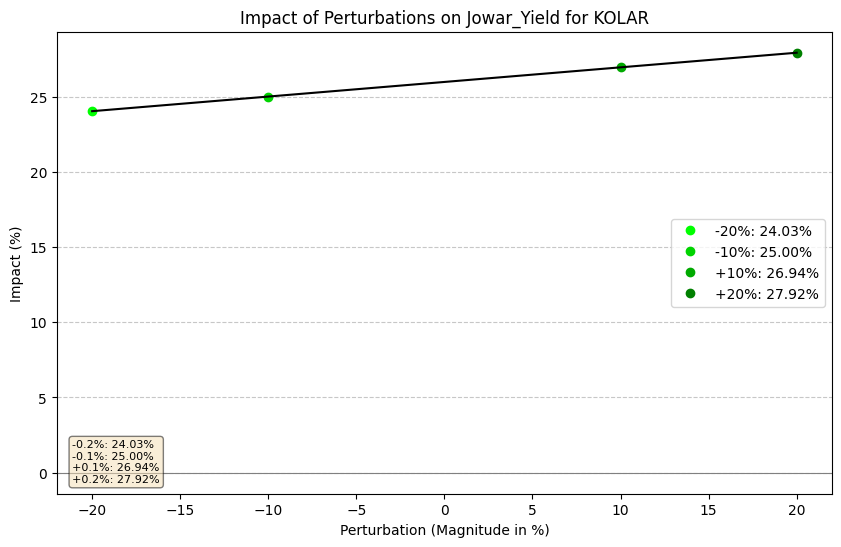

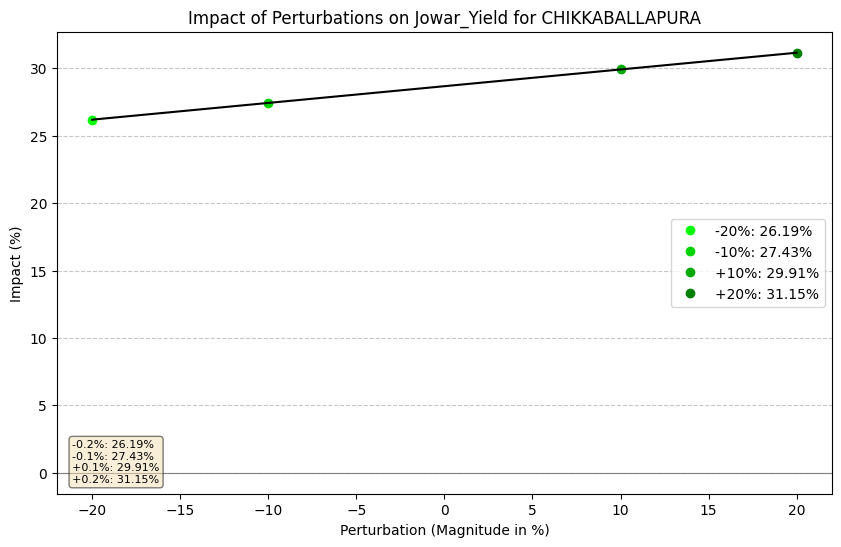

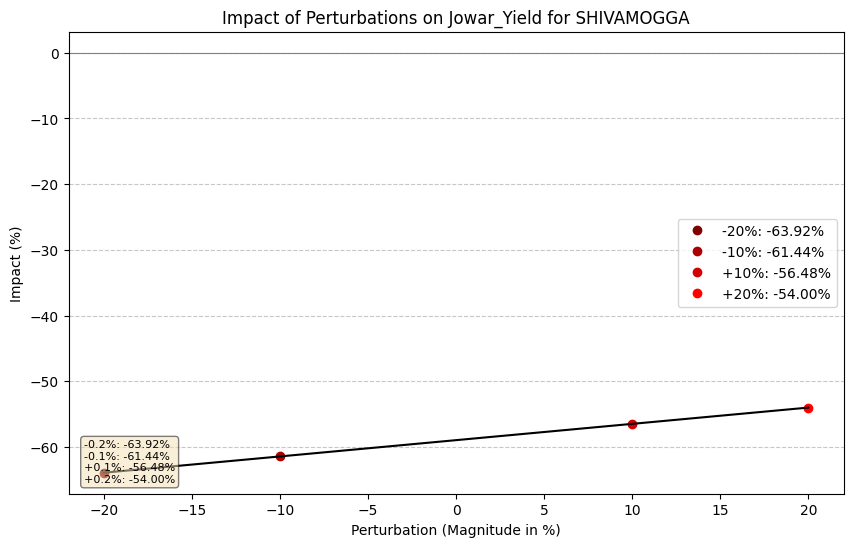

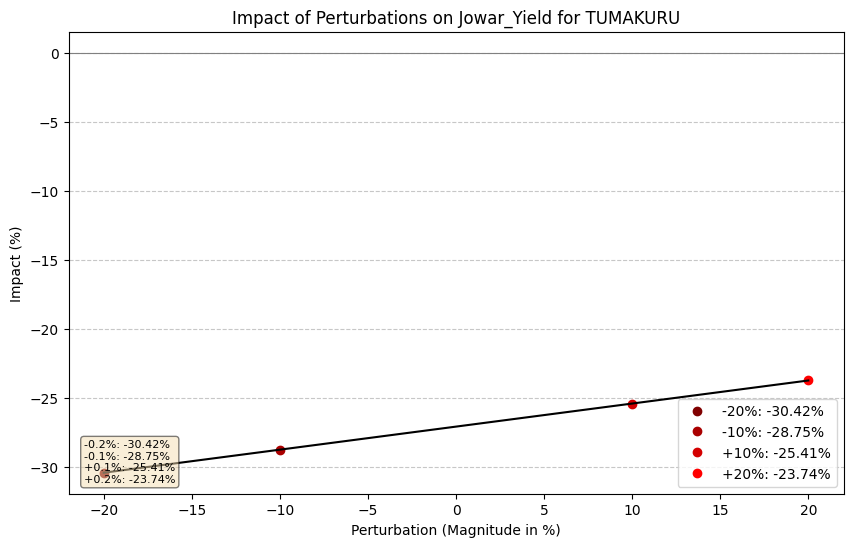

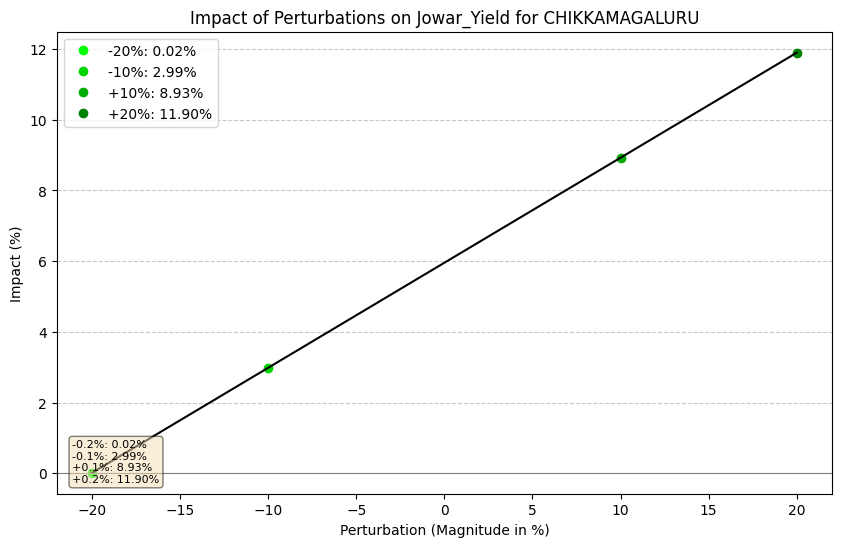

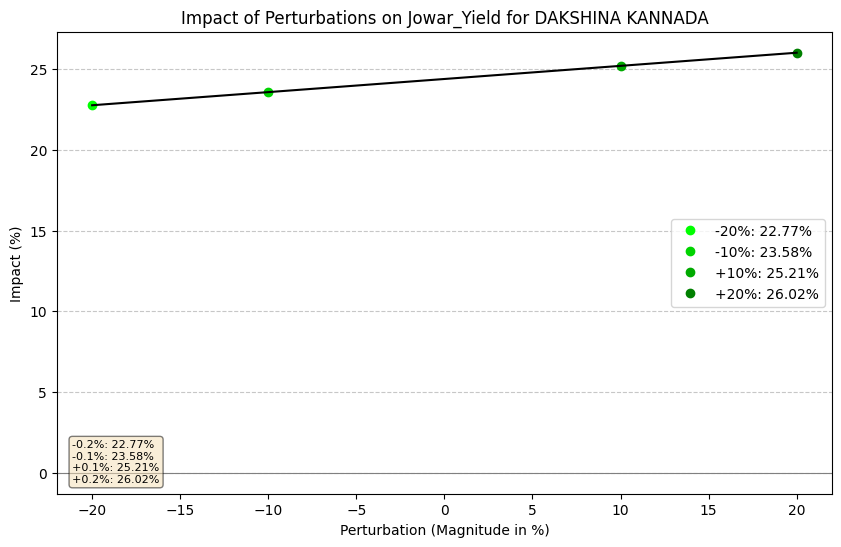

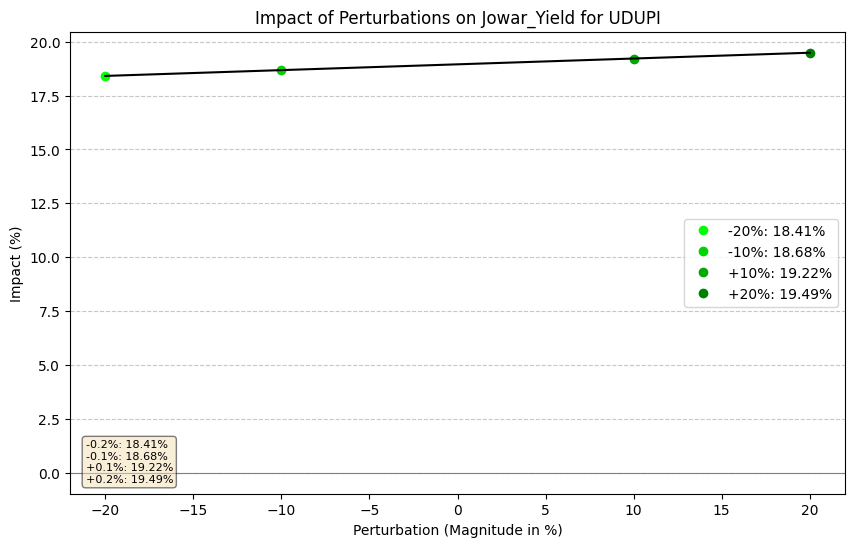

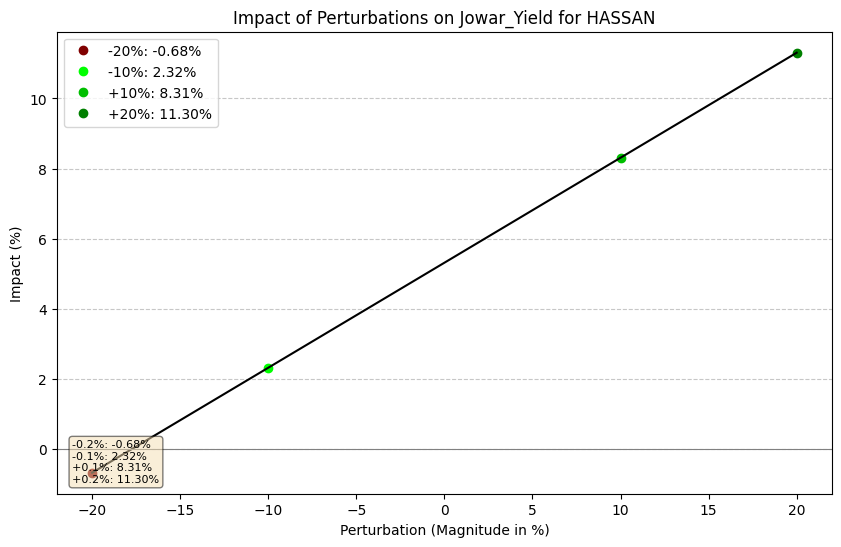

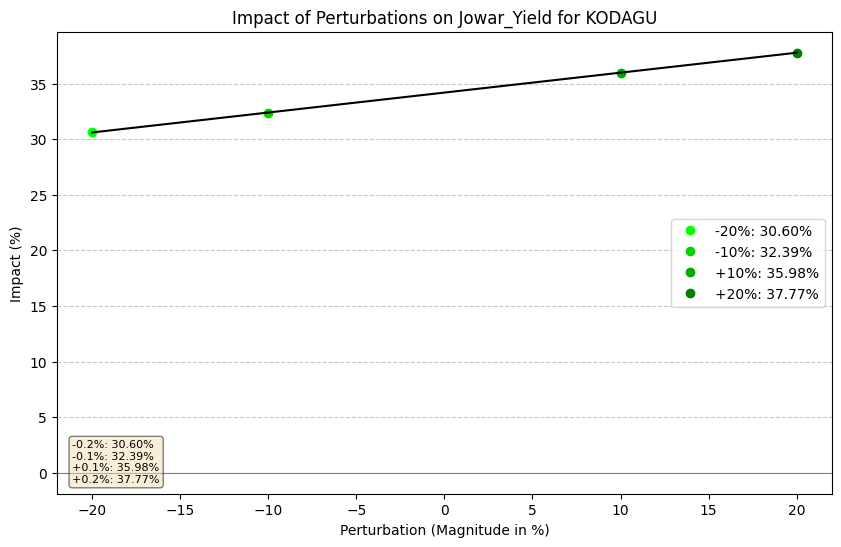

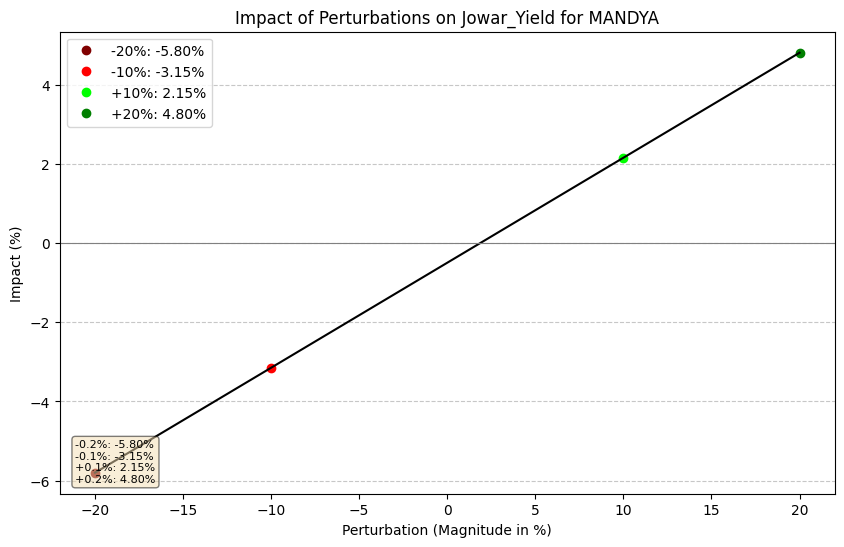

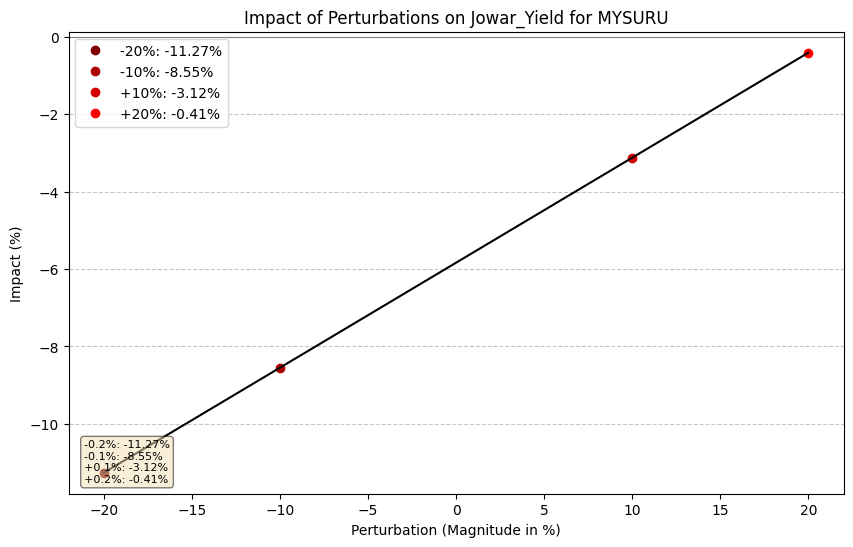

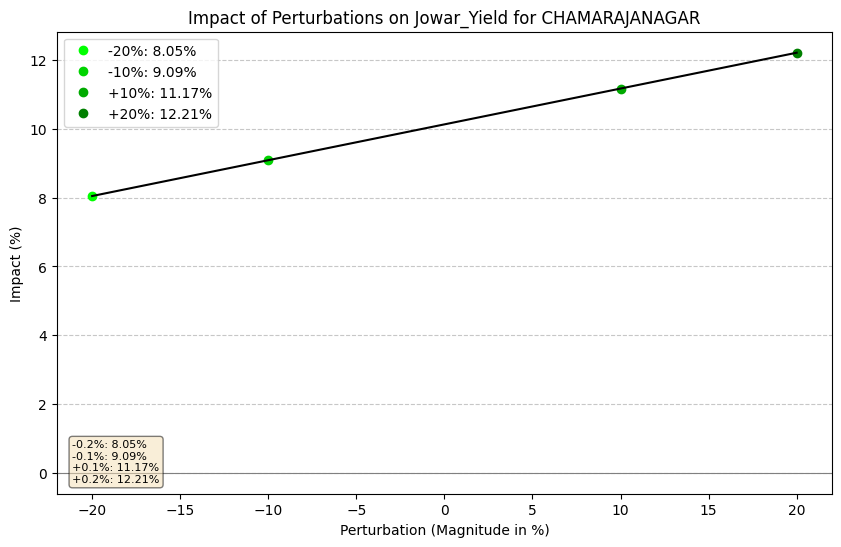

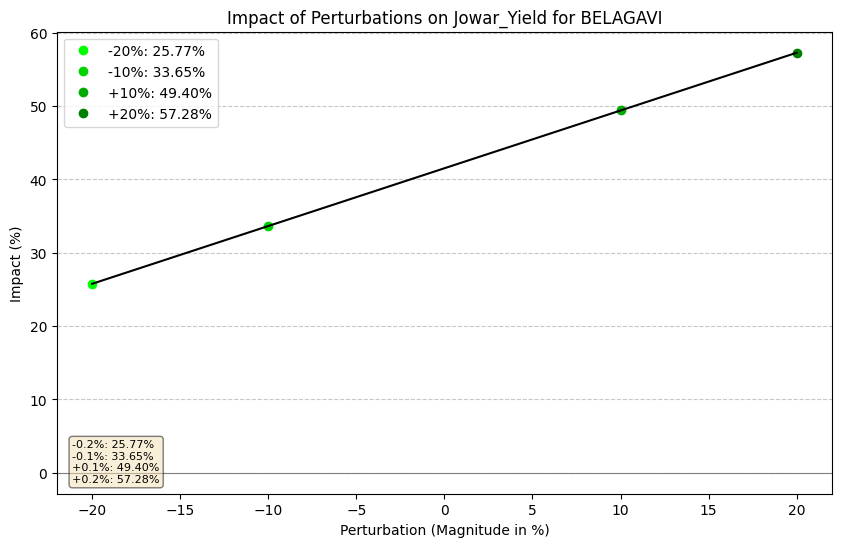

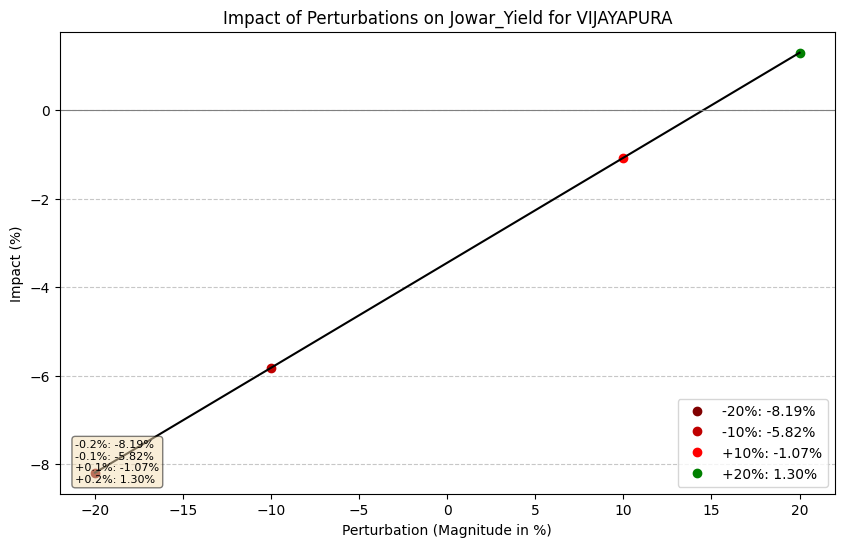

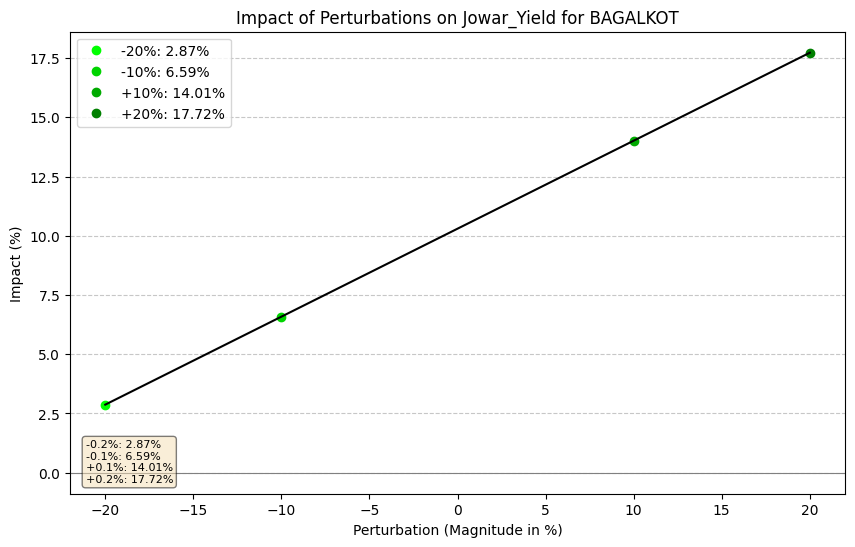

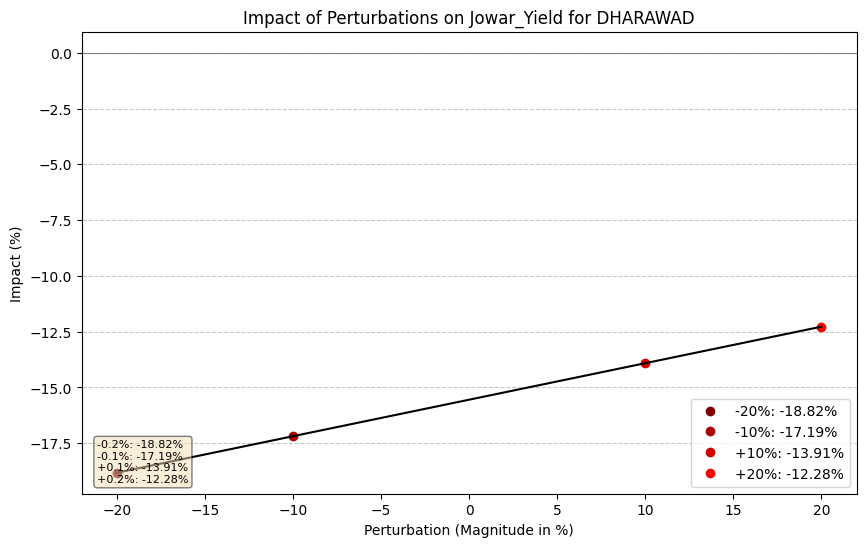

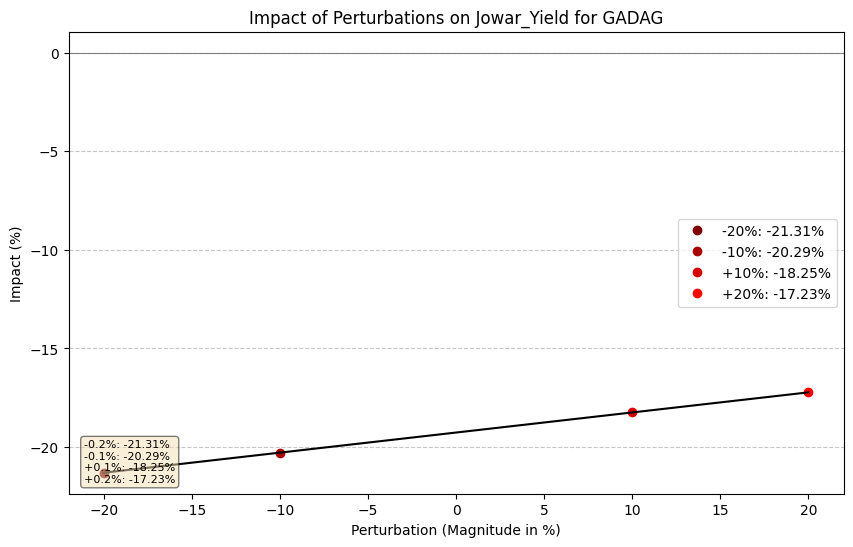

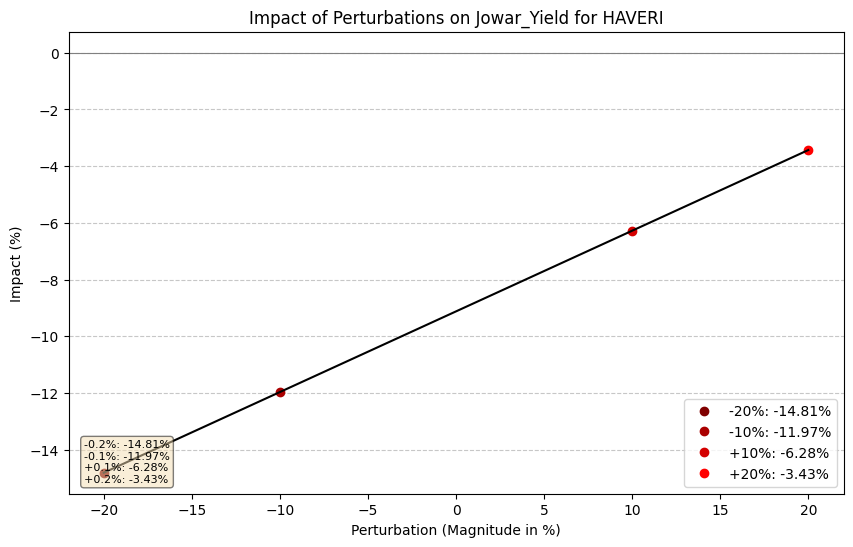

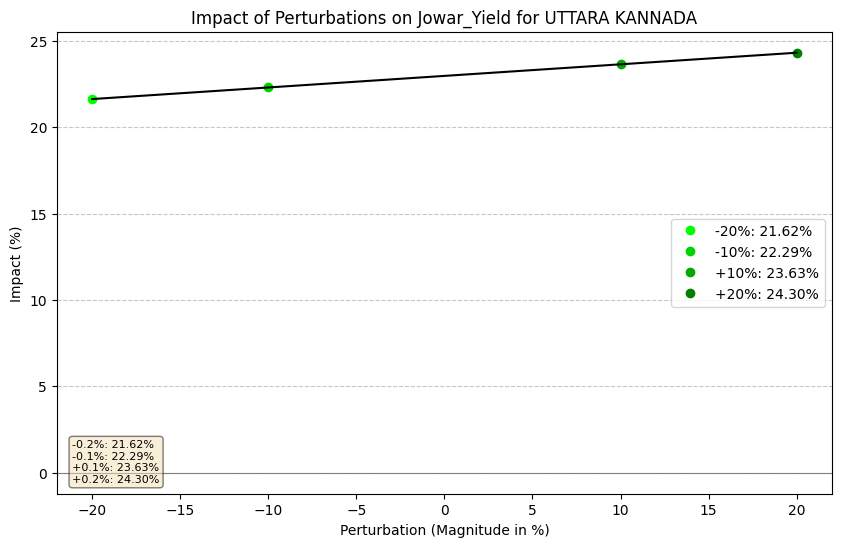

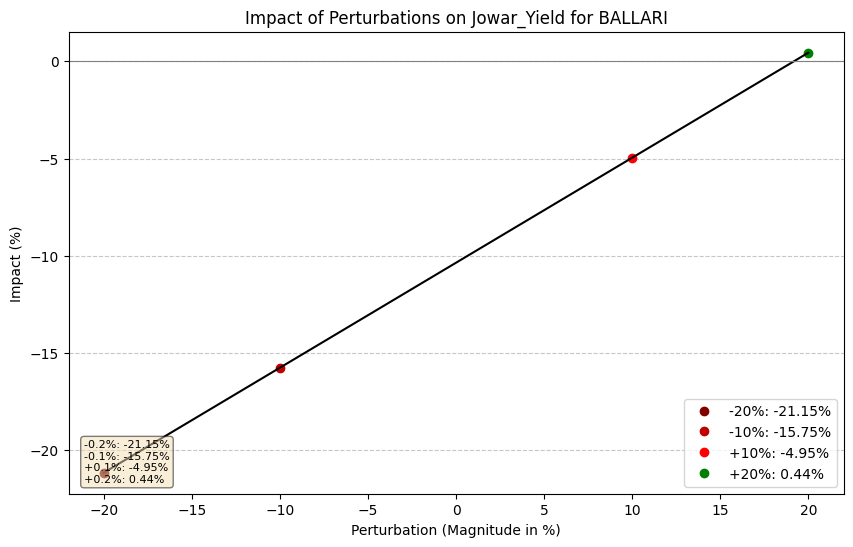

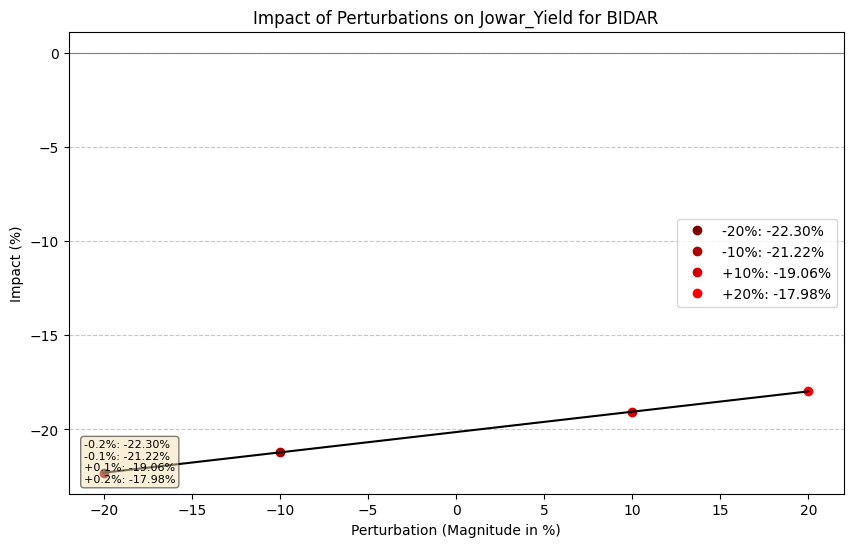

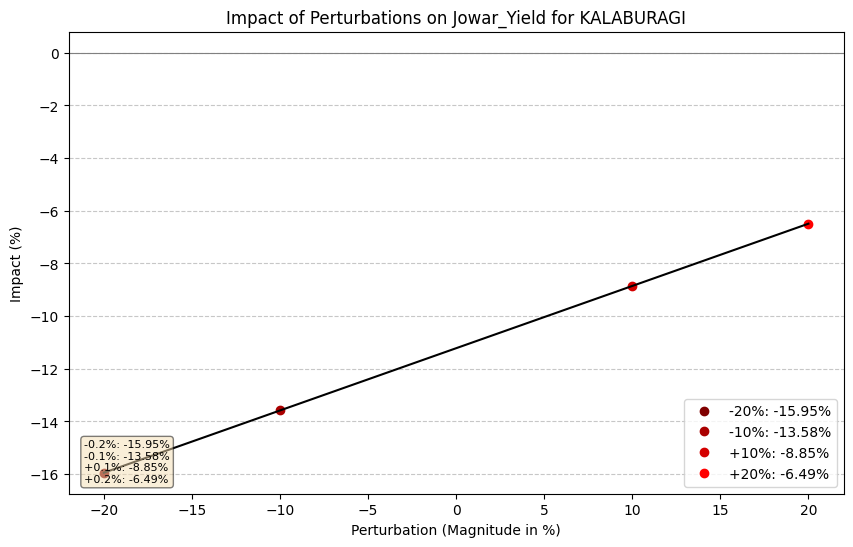

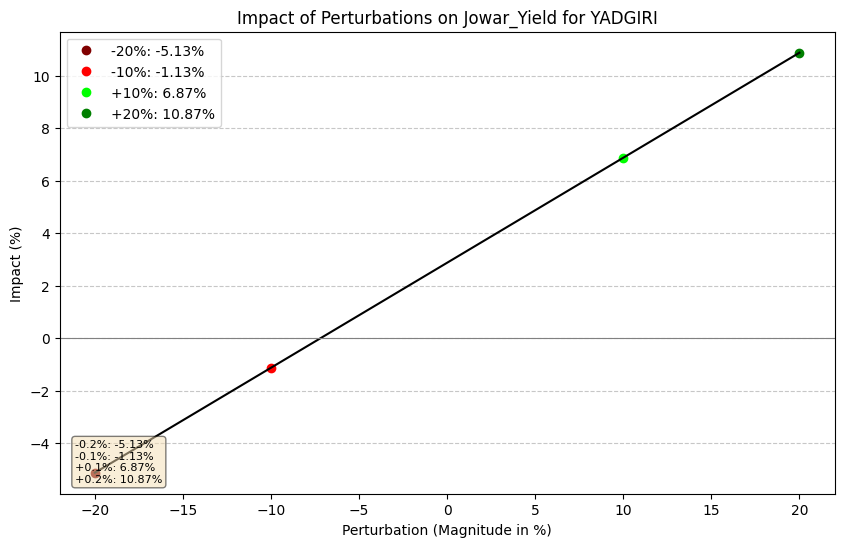

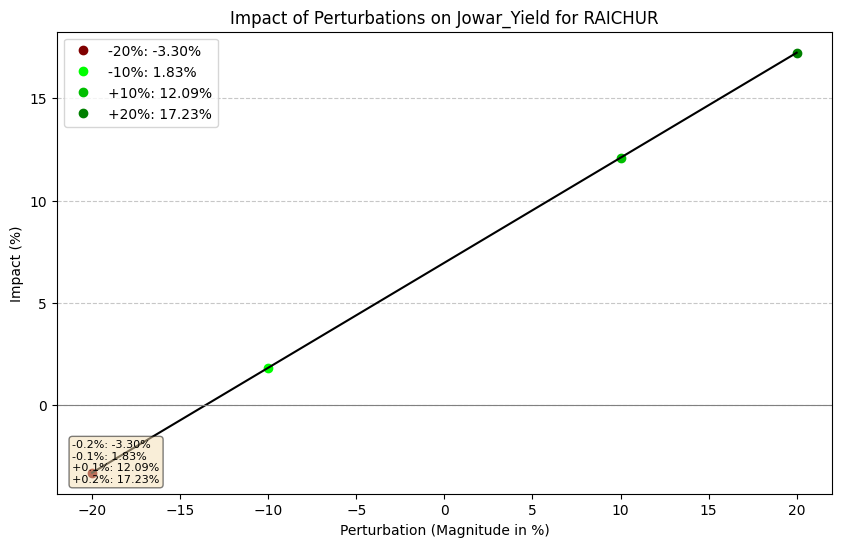

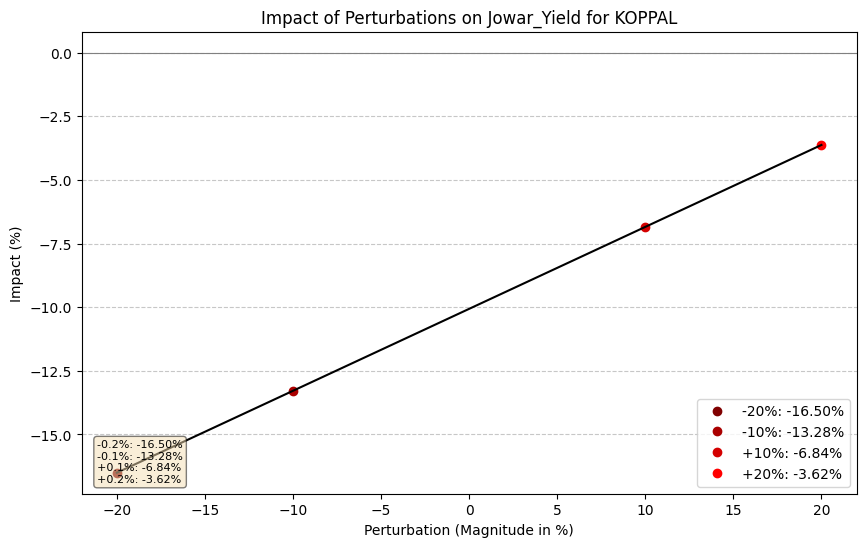

In [ ]:
######SIMILAR LINE GRAPH ANAYSIS
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjust this path as needed
data = pd.read_csv(file_path)

# Performing linear regression on the entire dataset
X = data[['TotalNPK']]
y = data['Jowar_Yield']
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# User provided perturbations in percentages
user_perturbations = [-20, -10, 10, 20]
# Converting percentages to fractions for calculation
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Min-max normalization parameters for 'Rice_Production'
rice_production_min = y.min()
rice_production_max = y.max()

# Function to generate colors based on impact
def generate_colors(impacts):
    # Reverse the lists to intensify the color with the impact
    positive_impacts = sorted([imp for imp in impacts if imp > 0], reverse=True)
    negative_impacts = sorted([imp for imp in impacts if imp < 0], reverse=False)  # Reverse sorting for negative

    # Calculate gradients
    green_gradients = np.linspace(0.5, 1, len(positive_impacts)) if positive_impacts else []
    red_gradients = np.linspace(0.5, 1, len(negative_impacts)) if negative_impacts else []

    colors = []
    for impact in impacts:
        if impact > 0:
            index = positive_impacts.index(impact)
            color = (0, green_gradients[index], 0)  # More intense green for higher positive impacts
        elif impact < 0:
            index = negative_impacts.index(impact)
            color = (red_gradients[index], 0, 0)  # More intense red for more negative impacts
        else:
            color = (0.8, 0.8, 0.8)  # Neutral grey for no impact
        colors.append(color)

    return colors

# Loop through each unique district in the dataset
for district in data['District'].unique():
    district_totalnpk = data.loc[data['District'] == district, 'TotalNPK'].iloc[0]
    rice_production_old = data.loc[data['District'] == district, 'Jowar_Yield'].iloc[0]
    normalized_old = (rice_production_old - rice_production_min) / (rice_production_max - rice_production_min)

    impacts = []

    for p in perturbations_corrected:
        perturbed_totalnpk = district_totalnpk * (1 + p)
        rice_production_new = m * perturbed_totalnpk + c
        normalized_new = (rice_production_new - rice_production_min) / (rice_production_max - rice_production_min)
        impact = (normalized_new - normalized_old) * 100  # Impact calculation
        impacts.append(impact)

    # Generate colors based on sorted impacts
    colors = generate_colors(impacts)

    # Plotting the impacts of each perturbation with a line graph
    plt.figure(figsize=(10, 6))
    for i, (perturbation, impact) in enumerate(zip(perturbations_corrected, impacts)):
        plt.plot(perturbation*100, impact, 'o', color=colors[i], label=f'{perturbation*100:+.0f}%: {impact:.2f}%')

    # Adding a table with key-value pairs at the corner
    table_text = '\n'.join([f'{p:+}%: {impact:.2f}%' for p, impact in zip(perturbations_corrected, impacts)])
    plt.text(0.02, 0.02, table_text, transform=plt.gca().transAxes, fontsize=8, verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Connect dots with a line
    plt.plot([p*100 for p in perturbations_corrected], impacts, 'k-')

    plt.xlabel('Perturbation (Magnitude in %)')
    plt.ylabel('Impact (%)')
    plt.title(f'Impact of Perturbations on Jowar_Yield for {district}')
    plt.axhline(0, color='gray', linewidth=0.8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjust this path as needed
data = pd.read_csv(file_path)

# Performing linear regression on the entire dataset
X = data[['TotalNPK']]
y = data['Jowar_Yield']
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# User provided perturbations in percentages
user_perturbations = [-20,-10,10,20]
# Converting percentages to fractions for calculation
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Min-max normalization parameters for 'Rice_Production'
rice_production_min = y.min()
rice_production_max = y.max()

# Initialize an empty list to store results for each district
district_results = []

# Loop through each unique district in the dataset
for district in data['District'].unique():
    district_totalnpk = data.loc[data['District'] == district, 'TotalNPK'].iloc[0]
    rice_production_old = data.loc[data['District'] == district, 'Jowar_Yield'].iloc[0]
    normalized_old = (rice_production_old - rice_production_min) / (rice_production_max - rice_production_min)

    positive_impacts = []
    negative_impacts = []

    for p in perturbations_corrected:
        perturbed_totalnpk = district_totalnpk * (1 + p)
        rice_production_new = m * perturbed_totalnpk + c
        normalized_new = (rice_production_new - rice_production_min) / (rice_production_max - rice_production_min)
        impact = (normalized_new - normalized_old) * 100  # Impact calculation

        if impact > 0:
            positive_impacts.append((impact, p))
        elif impact < 0:
            negative_impacts.append((impact, p))

    # Choose perturbation based on conditions
    if positive_impacts and not negative_impacts:
        chosen_perturbation = max(positive_impacts)[1]
    elif not positive_impacts and negative_impacts:
        chosen_perturbation = max(negative_impacts)[1]       ####absolute differece between new and old is less=max negative value
    elif positive_impacts and negative_impacts:
        chosen_perturbation = max(positive_impacts)[1]

    district_results.append({
        'District': district,
        'Perturbation_Choosen': f'P{user_perturbations.index(chosen_perturbation*100)+1}'
    })

# Convert the results into a DataFrame and display
results_df = pd.DataFrame(district_results)
print(results_df)

            District Perturbation_Choosen
0          BENGALURU                   P4
1       BENGALURU(R)                   P4
2         RAMANAGARA                   P4
3        CHITRADURGA                   P4
4         DAVANAGERE                   P4
5              KOLAR                   P4
6    CHIKKABALLAPURA                   P4
7         SHIVAMOGGA                   P4
8           TUMAKURU                   P4
9     CHIKKAMAGALURU                   P4
10  DAKSHINA KANNADA                   P4
11             UDUPI                   P4
12            HASSAN                   P4
13            KODAGU                   P4
14            MANDYA                   P4
15            MYSURU                   P4
16    CHAMARAJANAGAR                   P4
17          BELAGAVI                   P4
18        VIJAYAPURA                   P4
19          BAGALKOT                   P4
20          DHARAWAD                   P4
21             GADAG                   P4
22            HAVERI              

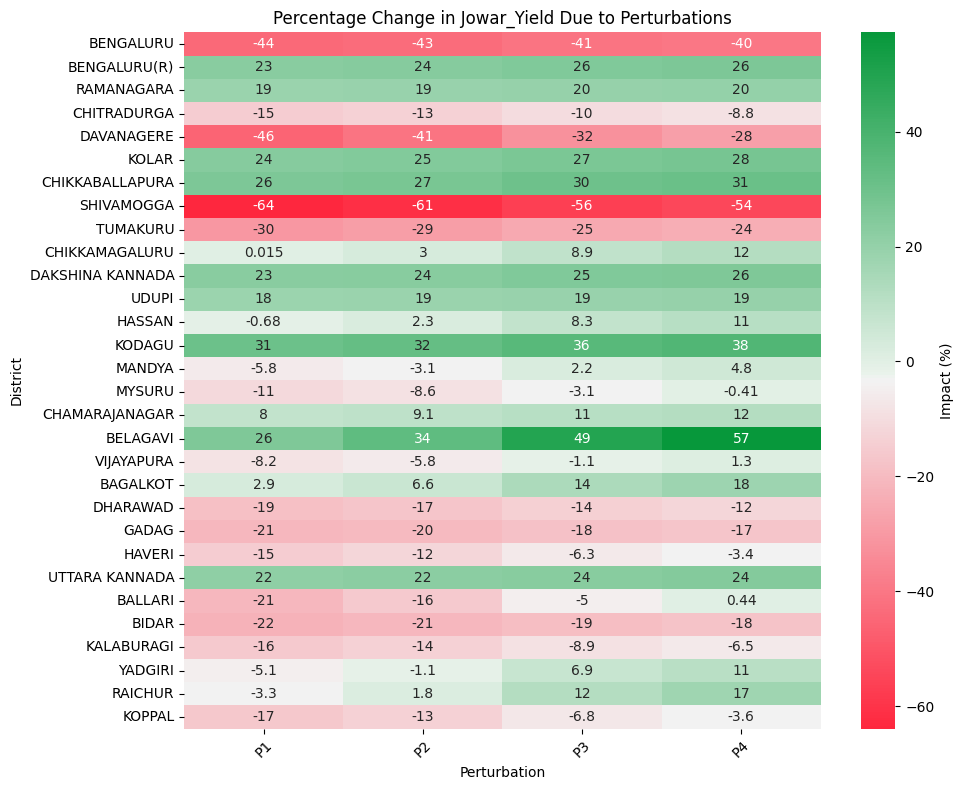

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjust this path as needed
data = pd.read_csv(file_path)

# Performing linear regression on the entire dataset
X = data[['TotalNPK']]
y = data['Jowar_Yield']
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# User provided perturbations in percentages
user_perturbations = [-20, -10, 10, 20]
# Converting percentages to fractions for calculation
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Calculate impacts for each district and perturbation
impact_results = []

for district in data['District'].unique():
    district_data = []
    district_totalnpk = data.loc[data['District'] == district, 'TotalNPK'].iloc[0]
    original_rice_production = data.loc[data['District'] == district, 'Jowar_Yield'].iloc[0]
    for perturbation in perturbations_corrected:
        perturbed_totalnpk = district_totalnpk * (1 + perturbation)
        rice_production_predicted = m * perturbed_totalnpk + c
        normalized_new = (rice_production_predicted - y.min()) / (y.max() - y.min())
        normalized_old = (original_rice_production - y.min()) / (y.max() - y.min())
        impact = (normalized_new - normalized_old) * 100
        district_data.append(impact)
    impact_results.append(district_data)

# Create a DataFrame for the heatmap
impact_df = pd.DataFrame(impact_results, columns=[f'P{i+1}' for i in range(len(user_perturbations))], index=data['District'].unique())

# Custom color palette from red to green
cmap = sns.diverging_palette(10, 133, s=99, l=55, sep=3, as_cmap=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(impact_df, cmap=cmap, annot=True, cbar_kws={'label': 'Impact (%)'})
plt.title('Percentage Change in Jowar_Yield Due to Perturbations')
plt.ylabel('District')
plt.xlabel('Perturbation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()